In [1]:
#Θέμα 1
import numpy as np
import pandas as pd

class short_rate:
    def __init__(self,name,rate):
        self.name = name
        self.rate = rate
    def get_discount_factors(self,time_list):
        time_list = np.array(time_list)#Θα το κάνει np.array τον χρόνο
        return np.exp( - self.rate * time_list)

In [2]:
class thema_1(short_rate):
    def get_NCF(self,cash_flows,time_list):#συνάρτηση που επιστρέφει τις καθαρές ταμειακές ροές
        self.NCF = cash_flows* self.get_discount_factors(time_list)
        return self.NCF
    def get_NPV(self,cash_flows,time_list):#συνάρτηση που επιστρέφει την καθαρ΄ή παρο΄ύσα αξία
        self.NPV=sum(self.get_NCF(cash_flows,time_list))
        return self.NPV

In [4]:
apo1=thema_1('EP',0.05)
cash_flows=[10,20,30,40,50,60]
time_list=[0,0.5,1,1.5,2,2.5]
print('οι καθαρές ταμειακές ροές είναι:', apo1.get_NCF(cash_flows,time_list))#εκτυπώνει τις καθαρές ταμειακές
print('η καθαρή παρούσα αξία είναι:', apo1.get_NPV(cash_flows,time_list))#εκτυπώνει την καθαρή παρούσα αξία

οι καθαρές ταμειακές ροές είναι: [10.         19.50619824 28.53688274 37.10973945 45.2418709  52.94981416]
η καθαρή παρούσα αξία είναι: 193.3445054856039


In [62]:
#Θέμα 2
import matplotlib.pyplot as plt
class thema_2(thema_1):
    def __init__(self, cash_flows, time_list, rates):
        self.matrix=np.zeros(len(rates))
        for i in range(len(rates)):
            self.rate=rates[i]
            self.matrix[i]=self.get_NPV(cash_flows,time_list)
    def get_matrix(self):# συνάρτηση που επιστρέφει τις καθαρές παρούσες αξίες με την σειρά των επιτοκίων που δίνονται
        return self.matrix
    def plot_for_NPV(self): # έξτρα ώστε να δειχθούν οι ΚΠΑ με τα επιτόκια
        plt.plot(self.matrix,'cornflowerblue')
        plt.plot(self.matrix,'ro')
        plt.title('Net Present Value Diagramm', loc= 'left')
        plt.grid(True) # εμφάνιση πλέγματος
        plt.axis('tight') # προσαρμογή αξόνων
        plt.xlabel('rates' , fontweight = 'bold') # τίτλος άξονα x
        plt.ylabel('NPV Value' , fontweight = 'bold') # τίτλος άξονα y

In [50]:
rates=[0.05,0.1,0.15,0.3]
cash_flows=[10,20,30,40,50,60]
time_list=[0,0.5,1,1.5,2,2.5]
apo2=thema_2(cash_flows,time_list,rates)
print('οι καθαρές παρούσες αξίες είναι:', apo2.get_matrix())#εκτυπώνει τις ΚΠΑ ανάλογα με το πλήθος των επιτοκίων που δίνονται

#εδώ έχουμε 4 ΚΠΑ καθώς δίνονται 4 επιτόκια

[193.34450549 178.26261473 164.59502553 130.72640718]


None


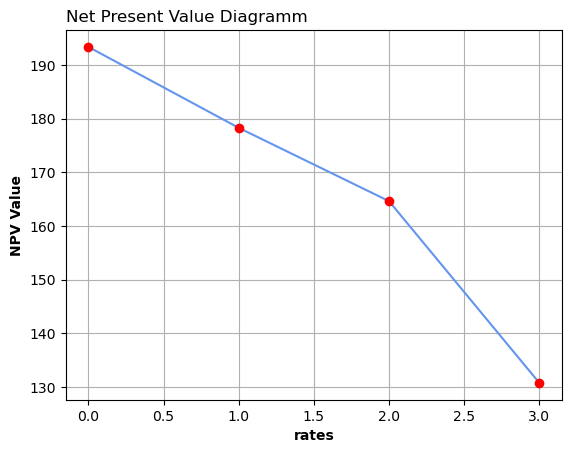

In [63]:
rates=[0.05,0.1,0.15,0.3]
cash_flows=[10,20,30,40,50,60]
time_list=[0,0.5,1,1.5,2,2.5]
apo2=thema_2(cash_flows,time_list,rates)
print(apo2.plot_for_NPV())#εκτυπώνουμε το διάγραμμα, απεικονίζοντας τις ΚΠΑ με τα επιτόκια